# グローバーのアルゴリズム
最後にグローバーのアルゴリズムを組んでみます。
今回は、２量子ビットの重ね合わせ（|00>、|01>、|10>、|11>）から |11> のみを取り出すアルゴリズムを作ります。

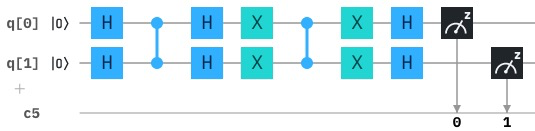

In [1]:
# Qiskitライブラリーを導入
from qiskit import *
from qiskit.visualization import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

まず２量子ビットの重ね合わせ回路を作ります。

In [ ]:
# 2量子ビット回路を用意
q = QuantumCircuit(2,2)    # ２量子ビット回路と２ビットの古典レジスターを用意します。

# q0とq1それぞれを重ね合わせにします。
# コードを記入
# コードを記入

# 全体の回路を描画
q.draw(output="mpl")

この状態ベクトルは、[ 0.5+0j, 0.5+0j, 0.5+0j, 0.5+0j ]　で、確率振幅のグラフは下のようになります。
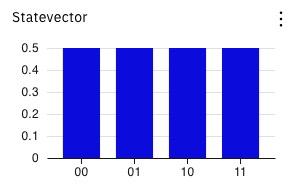

次に、11のみマイナスをつける回路を追加します。これは、制御Zゲートで実現できます。<br>
（復習：Zゲートは、$|1\rangle$にかけると$-|1\rangle$になるゲートでした。制御Zゲートは、制御ゲートが$|1\rangle$のときのみ標的ゲートにZを操作します。）

In [ ]:
# czゲートを制御ビットq0、標的ビットq1で追加します。
# コードを記入

# 全体の回路を描画
q.draw(output="mpl")

状態ベクトルは、[ 0.5+0j, 0.5+0j, 0.5+0j, -0.5+0j ]になります。IQXの棒グラフでは黄色の表示は実部がマイナス向きです。
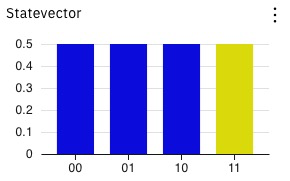

次に以下の回路を追加します。この部分は確率振幅の平均値での反転回路になります。
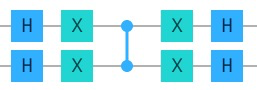

In [ ]:
# 上の回路を追加してください。
# コードを記入
#　・
#　・
#　・
# コードを記入

# 全体の回路を描画
q.draw(output="mpl")

この回路が行っている処理のイメージは、次のように、符号を反転させた状態の確率振幅を大きくし、それ以外を小さくするという操作になります。<br>
個々の詳細な計算は、こちらを参照してください：
https://www.ibm.com/developerworks/jp/cloud/library/cl-quantum-computing/index.html
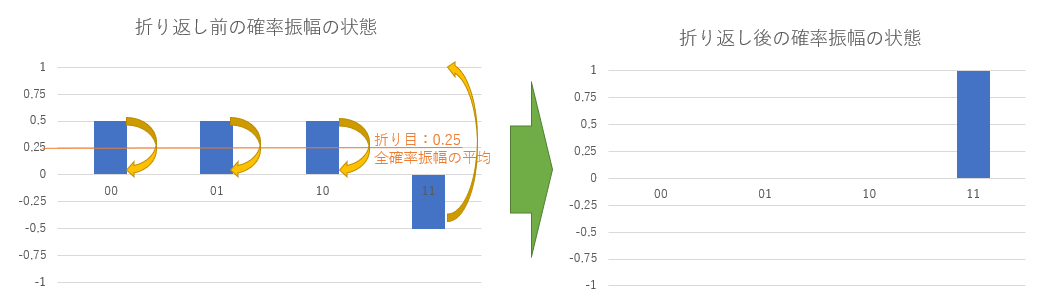



測定ゲートを追加してシミュレーターで実行してみましょう。

In [ ]:
# 回路を測定します
# q0を測定して、古典レジスター0に入れます。
# コードを記入

# q1を測定して、古典レジスター1に入れます。
# コードを記入

# 全体の回路を描画
q.draw(output="mpl")

In [ ]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(q, backend=simulator, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(q)
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

$|11\rangle$だけが測定されましたか。<br>
グローバーのアルゴリズムは、2019年秋に開催された[Quantum Challenge](https://quantumchallenge19.com/ja/)の[Week2](https://github.com/quantum-challenge/2019/blob/master/problems/week2/week2.ipynb), [3](https://github.com/quantum-challenge/2019/blob/master/problems/week3/week3.ipynb), [4](https://github.com/quantum-challenge/2019/blob/master/problems/final/Final.ipynb)でも実用的な例を含めて取り上げられていますので、ぜひ挑戦してみてください。